# Project 2 - Ames Housing Data and Kaggle Challenge

In [1]:
#Imports libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import  LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

## Data Import and Cleaning

### Read in Train and Test data

In [2]:
train_data = pd.read_csv('./datasets/train.csv', keep_default_na=False, na_values=[''])
test_data = pd.read_csv('./datasets/test.csv', keep_default_na=False, na_values=[''])

### Display first five rows of the two datasets

In [3]:
train_data.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [4]:
test_data.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NA,Reg,Lvl,...,0,0,0,NA,NA,NA,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NA,IR1,Lvl,...,0,185,0,NA,NA,NA,0,7,2009,WD


### Check data types

In [5]:
train_data.dtypes[:55]

Id                   int64
PID                  int64
MS SubClass          int64
MS Zoning           object
Lot Frontage       float64
Lot Area             int64
Street              object
Alley               object
Lot Shape           object
Land Contour        object
Utilities           object
Lot Config          object
Land Slope          object
Neighborhood        object
Condition 1         object
Condition 2         object
Bldg Type           object
House Style         object
Overall Qual         int64
Overall Cond         int64
Year Built           int64
Year Remod/Add       int64
Roof Style          object
Roof Matl           object
Exterior 1st        object
Exterior 2nd        object
Mas Vnr Type        object
Mas Vnr Area       float64
Exter Qual          object
Exter Cond          object
Foundation          object
Bsmt Qual           object
Bsmt Cond           object
Bsmt Exposure       object
BsmtFin Type 1      object
BsmtFin SF 1       float64
BsmtFin Type 2      object
B

### Number of rows and columns in Train and Test data

In [6]:
print(train_data.shape)
print(test_data.shape)

(2051, 81)
(878, 80)


### Check for missing values in Train and Test data

In [7]:
train_data.isnull().sum().sort_values(ascending=False)[:26]

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Type       22
Mas Vnr Area       22
Bsmt Exposure       4
BsmtFin Type 2      2
Bsmt Full Bath      2
Bsmt Half Bath      2
Garage Cond         1
Bsmt Qual           1
Garage Finish       1
Garage Cars         1
Garage Area         1
Garage Qual         1
Total Bsmt SF       1
BsmtFin Type 1      1
Bsmt Cond           1
BsmtFin SF 1        1
BsmtFin SF 2        1
Bsmt Unf SF         1
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
dtype: int64

In [8]:
test_data.isnull().sum().sort_values(ascending=False)[:19]

Lot Frontage      160
Garage Yr Blt      45
Garage Finish       1
Mas Vnr Area        1
Mas Vnr Type        1
Electrical          1
Misc Feature        0
Half Bath           0
Mo Sold             0
Yr Sold             0
TotRms AbvGrd       0
Kitchen Qual        0
Kitchen AbvGr       0
Bedroom AbvGr       0
Full Bath           0
Fireplaces          0
Bsmt Half Bath      0
Bsmt Full Bath      0
Gr Liv Area         0
dtype: int64

### Fix column names by replacing spaces with underscores and converting them to lower case

In [9]:

train_data.columns = train_data.columns.str.replace(' ', '_')
train_data.columns = train_data.columns.str.lower()

In [10]:
test_data.columns = test_data.columns.str.replace(' ', '_')
test_data.columns = test_data.columns.str.lower()

The data set has a substantial amount of missing values.I chose to address these by replacing nulls in categorical columns with the string ’NA’, and nulls in numerical columns with 0.0 for both the datasets

In [11]:
categorical_columns=['pool_qc', 'misc_feature', 'alley', 'fence', 'fireplace_qu', 'garage_finish', 'garage_cond', 
              'garage_qual', 'garage_type', 'bsmt_exposure', 'bsmtfin_type_2', 'bsmtfin_type_1', 'bsmt_cond', 
              'bsmt_qual', 'mas_vnr_type'] 
[train_data[col].replace(np.nan,'NA',inplace=True) for col in categorical_columns]
train_data.head(3)# Replacing missing values with 'NA' for all categorical columns

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000


In [12]:
[test_data[col].replace(np.nan,'NA',inplace=True) for col in categorical_columns]
test_data.head(3)# Replacing missing values with 'NA' for all categorical columns

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New


In [13]:
numerical_columns=['lot_frontage', 'garage_yr_blt', 'mas_vnr_area', 'bsmt_half_bath', 'bsmt_full_bath', 
                'garage_cars', 'garage_area', 'bsmt_unf_sf', 'bsmtfin_sf_2', 'total_bsmt_sf', 'bsmtfin_sf_1']
[train_data[col].fillna(value=0.0,inplace=True) for col in numerical_columns]
train_data.head(3) # Converting missing values to 0.0 for numeric data

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000


In [14]:
[test_data[col].fillna(value=0.0,inplace=True) for col in numerical_columns]
test_data.head(3) # Converting missing values to 0.0 for numeric data

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NA,NA,NA,0,4,2006,WD
1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,0,0,0,NA,NA,NA,0,9,2006,New


In [15]:
train_data.replace('None', 'NA', inplace=True)
train_data['mas_vnr_type'].unique() # Converting all "None" values to 'NA'

array(['BrkFace', 'NA', 'Stone', 'BrkCmn'], dtype=object)

In [16]:
test_data.replace('None', 'NA', inplace=True)
test_data['mas_vnr_type'].unique() # Converting all "None" values to 'NA'

array(['NA', 'BrkFace', 'Stone', 'BrkCmn', 'CBlock'], dtype=object)

### Feature Engineering

- The data set has a variety of data types - nominal, ordinal, discrete, and continuous variables. 
- Multiple columns are describing a single feature like 9 columns related to Basement. As this may lead to multicollinearity, I transformed the data to avoid that.

In [17]:
# Consolidating bathrooms
train_data['bathrooms'] = train_data['bsmt_full_bath'] + train_data['full_bath']+(train_data['bsmt_half_bath']/2) + (train_data['half_bath']/2)

In [18]:
# Consolidating bathrooms
test_data['bathrooms'] = test_data['bsmt_full_bath'] + test_data['full_bath']+(test_data['bsmt_half_bath']/2) + (test_data['half_bath']/2)

In [19]:
#Modify 'pool_qc' and create 'has_pool'
train_data['has_pool'] = np.where(train_data['pool_qc'].str.contains('NA'), 0, 1)

In [20]:
#Modify 'pool_qc' and create 'has_pool'
test_data['has_pool'] = np.where(test_data['pool_qc'].str.contains('NA'), 0, 1)

In [21]:
#Modify 'fence' and create 'has_fence'
train_data['has_fence'] = np.where(train_data['fence'].str.contains('NA'), 0, 1)

In [22]:
#Modify 'fence' and create 'has_fence'
test_data['has_fence'] = np.where(test_data['fence'].str.contains('NA'), 0, 1)

In [23]:
#Modify 'central_air' and create 'has_central_air'
train_data['has_central_air'] = np.where(train_data['central_air'].str.contains('N'), 0, 1)

In [24]:
#Modify 'central_air' and create 'has_central_air'
test_data['has_central_air'] = np.where(test_data['central_air'].str.contains('N'), 0, 1)

In [25]:
#Modify 'street' and create 'paved_street'
train_data['paved_street'] = train_data['street'].map({'Pave': 1, 'Grvl': 0})

In [26]:
#Modify 'street' and create 'paved_street'
test_data['paved_street'] = test_data['street'].map({'Pave': 1, 'Grvl': 0})

In [27]:
#Modify 'garage_finish' and create 'has_garage'
train_data['has_garage'] = np.where(train_data['garage_finish'].str.contains('NA'), 0, 1)

In [28]:
#Modify 'garage_finish' and create 'has_garage'
test_data['has_garage'] = np.where(test_data['garage_finish'].str.contains('NA'), 0, 1)

In [29]:
# Convert 'year_remod/add' to numerical 'is_remodeled'
train_data['is_remodeled'] = np.where(train_data['year_remod/add'] - train_data['year_built'] > 0, 1, 0)

In [30]:
# Convert 'year_remod/add' to numerical 'is_remodeled'
test_data['is_remodeled'] = np.where(test_data['year_remod/add'] - test_data['year_built'] > 0, 1, 0)

In [31]:
train_data.shape

(2051, 88)

In [32]:
test_data.shape

(878, 87)

In [33]:
train_data['garage_cars'] = train_data['garage_cars'].astype(int) #convert datatype from 'float' to 'int'

In [34]:
test_data['garage_cars'] = test_data['garage_cars'].astype(int) #convert datatype from 'float' to 'int'

### Rename the columns in Train and Test data

In [35]:

rename_columns_dict = {
    'pid': 'parcel_id',
    'ms_subclass' : 'ms_sub_class',
    'ms_zoning': 'zoning', 
    'lot_frontage': 'lot_frontage',
    'Lot Area': 'lot_sq_ft',
    'street': 'street', 
    'alley': 'alley', 
    'lot_shape': 'lot_shape', 
    'land_contour': 'property_flatness', 
    'utilities': 'utilities',       
    'lot_config': 'lot_config', 
    'land_slope': 'land_slope', 
    'neighborhood': 'neighborhood', 
    'condition_1': 'proximity_1',
    'condition_2': 'proximity_2', 
    'bldg_type': 'building_type', 
    'house_style': 'dwelling_style', 
    'overall_qual': 'house_quality_rating',
    'overall_cond': 'house_condition_rating', 
    'year_built': 'year_built', 
    'year_remod/add': 'remodel_year', 
    'roof_style': 'roof_style',
    'roof_matl': 'roof_material', 
    'exterior_1st': 'exterior_1', 
    'exterior_2nd': 'exterior_2', 
    'mas_vnr_type': 'masonry_type',
    'mas_vnr_area': 'masonry_area', 
    'exter_qual': 'exterior_quality', 
    'exter_cond': 'exterior_condition', 
    'foundation': 'foundation_type', 
    'bsmt_qual': 'basement_height',
    'bsmt_cond': 'basement_condition', 
    'bsmt_exposure': 'basement_exposure', 
    'bsmtfin_type_1': 'basement_finished_condition', 
    'bsmtfin_sf_1': 'basement_finished_sqft',
    'bsmtfin_type_2': 'basement_multipletypes_condition', 
    'bsmtfin_sf_2': 'basement_type2_finished_sqft', 
    'bsmt_unf_sf': 'unfinished_basement_sqft', 
    'total_bsmt_sf': 'total_basement_sqft',
    'heating': 'heating_type', 
    'heating_qc': 'heating_quality', 
    'central_air': 'central_air', 
    'has_central_air':'has_central_air',
    'electrical':'electrical_system', 
    '1st_flr_sf':'first_floor_sqft',
    '2nd_flr_sf': 'second_floor_sqft', 
    'low_qual_fin_sf': 'low_quality_sqft', 
    'gr_liv_area': 'above_ground_living_area_sqft', 
    'bsmt_full_bath': 'basement_full_bath',
    'bsmt_half_bath': 'basement_half_bath', 
    'full_bath': 'full_bath', 
    'half_bath': 'half_bath', 
    'bedroom_abvgr': 'bedrooms',
    'kitchen_abvgr': 'kitchens', 
    'kitchen_qual': 'kitchen_quality', 
    'totrms_abvgrd': 'total_rooms(non-bath)', 
    'functional': 'home_functionality',
    'fireplaces': 'fireplaces', 
    'fireplace_qu': 'fireplace_quality', 
    'garage_type': 'garage_location', 
    'garage_yr_blt': 'garage_year_built',
    'garage_finish': 'garage_interior_finish', 
    'garage_cars': 'garage_capacity', 
    'garage_area': 'garage_sqft', 
    'garage_qual': 'garage_quality',
    'garage_cond': 'garage_condition', 
    'paved_drive': 'driveway_type', 
    'wood_deck_sf': 'wood_deck_sqft', 
    'open_porch_sqft': 'open_porch_sqft',
    'enclosed_porch': 'enclosed_porch_sqft', 
    '3ssn_porch': 'three_season_porch_sqft', 
    'screen_porch': 'screen_porch_sqft', 
    'pool_area': 'pool_size', 
    'pool_qc': 'pool_quality',
    'fence': 'fence', 
    'misc_feature': 'misc_feature',
    'misc_val': 'misc_feature_value',
    'mo_sold': 'month_sold', 
    'yr_sold': 'year_sold', 
    'sale_type': 'sale_type', 
    'saleprice': 'price',
    'bathrooms' :'bathrooms',
    'has_pool' : 'has_pool',
    'has_fence' : 'has_fence',
    'paved_street' :'paved_street',
    'has_garage':'has_garage',
    'is_remodeled':'is_remodeled'
}

In [36]:
train_data.rename(columns=rename_columns_dict, inplace=True) #Rename the columns

In [37]:
test_data.rename(columns=rename_columns_dict, inplace=True) #Rename the columns

In [38]:
test_data.head(3)

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,street,alley,lot_shape,property_flatness,...,month_sold,year_sold,sale_type,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,4,2006,WD,2.0,0,0,0,1,1,1
1,2718,905108090,90,RL,0.0,9662,Pave,NA,IR1,Lvl,...,8,2006,WD,2.0,0,0,1,1,1,0
2,2414,528218130,60,RL,58.0,17104,Pave,NA,IR1,Lvl,...,9,2006,New,3.5,0,0,1,1,1,0


In [39]:
train_data.head(3)

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,street,alley,lot_shape,property_flatness,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,2010,WD,130500,2.5,0,0,1,1,1,1
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,2009,WD,220000,3.5,0,0,1,1,1,1
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,2010,WD,109000,2.0,0,0,1,1,1,1


### Drop the columns 

- Drop the original columns on which features in feature engineering were created.
- Drop 'basement_finished_sqft','basement_type2_finished_sqft','unfinished_basement_sqft' as the column 'total_basement_sqft' is the sum of all the three columns.
- Drop 'first_floor_sqft','second_floor_sqft','low_quality_sqft' as the column 'above_ground_living_area_sqft' is the sum of all the three columns.

In [40]:
train_data.drop(columns=['pool_quality','full_bath','half_bath','basement_full_bath',
                        'basement_half_bath','fence','street','central_air',
                        'garage_interior_finish','first_floor_sqft','second_floor_sqft','low_quality_sqft','basement_finished_sqft',
                         'basement_type2_finished_sqft','unfinished_basement_sqft','alley','remodel_year'
                         ],inplace=True)

In [41]:
train_data.head(3)

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
0,109,533352170,60,RL,0.0,13517,IR1,Lvl,AllPub,CulDSac,...,2010,WD,130500,2.5,0,0,1,1,1,1
1,544,531379050,60,RL,43.0,11492,IR1,Lvl,AllPub,CulDSac,...,2009,WD,220000,3.5,0,0,1,1,1,1
2,153,535304180,20,RL,68.0,7922,Reg,Lvl,AllPub,Inside,...,2010,WD,109000,2.0,0,0,1,1,1,1


In [42]:
test_data.drop(columns=['pool_quality','full_bath','half_bath','basement_full_bath',
                        'basement_half_bath','fence','street','central_air',
                        'garage_interior_finish','first_floor_sqft','second_floor_sqft','low_quality_sqft','basement_finished_sqft',
                         'basement_type2_finished_sqft','unfinished_basement_sqft','alley','remodel_year'
                         ],inplace=True)

In [43]:
test_data.head(3)

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,month_sold,year_sold,sale_type,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
0,2658,902301120,190,RM,69.0,9142,Reg,Lvl,AllPub,Inside,...,4,2006,WD,2.0,0,0,0,1,1,1
1,2718,905108090,90,RL,0.0,9662,IR1,Lvl,AllPub,Inside,...,8,2006,WD,2.0,0,0,1,1,1,0
2,2414,528218130,60,RL,58.0,17104,IR1,Lvl,AllPub,Inside,...,9,2006,New,3.5,0,0,1,1,1,0


## Exploratory Data Analysis

### Descriptive Statistics

In [44]:
train_data.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2198.0,2930.0
parcel_id,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
ms_sub_class,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,70.0,190.0
lot_frontage,2051.0,5.794442e+01,3.313733e+01,0.0,43.5,63.0,78.0,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,11513.5,159000.0
house_quality_rating,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.0,10.0
house_condition_rating,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.0,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2001.0,2010.0
masonry_area,2051.0,9.862652e+01,1.743247e+02,0.0,0.0,0.0,159.0,1600.0
total_basement_sqft,2051.0,1.057472e+03,4.499080e+02,0.0,793.0,994.0,1318.5,6110.0


In [45]:
train_data['price'].describe() 

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: price, dtype: float64

Average price of house is $181411

By above , summary statistics of the data we can see that numerical series values are drastically varied in order of magnitude which can be addressed during data modeling  by scaling the training and testing data prior to fitting. 

## Data Visualization

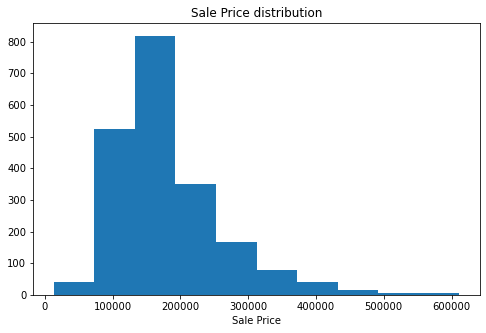

In [46]:
plt.figure(figsize=(8,5))
plt.hist(train_data[['price']])
plt.title('Sale Price distribution')
plt.xlabel('Sale Price');

 Sale price distribution  is right-skewed which means home prices tend to decrease in number as their value increases.

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


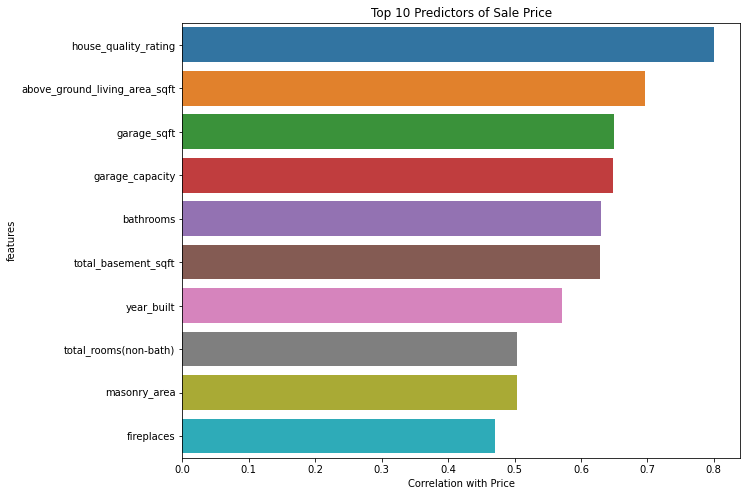

In [47]:
predictors = train_data.corr()[['price']].sort_values(by='price', ascending=False)
corr_df = pd.DataFrame(predictors.iloc[1:11])

plt.figure(figsize=(10, 8))
sns.barplot( corr_df['price'], corr_df.index)
plt.title('Top 10 Predictors of Sale Price')
plt.xlabel('Correlation with Price', fontsize=10);
plt.ylabel('features', fontsize=10);

Correlation of top 10 predictors with Sale Price(Target Variable)

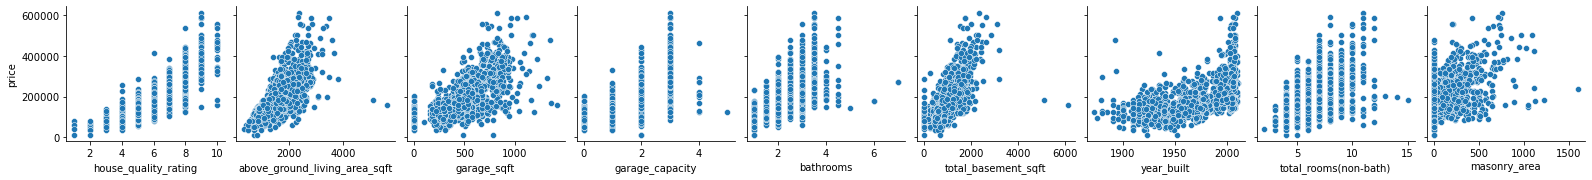

In [48]:
sns.pairplot(data=train_data,
                  x_vars=['house_quality_rating', 'above_ground_living_area_sqft', 'garage_sqft','garage_capacity','bathrooms',
                        'total_basement_sqft','year_built','total_rooms(non-bath)','masonry_area' ],
             y_vars=['price']);

Scatter plot of the top 10 predictors shows that there are outliers which needs to be removed

In [49]:
#Check number of rows 
train_data[train_data['total_basement_sqft'] >= 5000]

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
960,1499,908154235,60,RL,313.0,63887,IR3,Bnk,AllPub,Corner,...,2008,New,160000,4.5,1,0,1,1,1,0
1885,2181,908154195,20,RL,128.0,39290,IR1,Bnk,AllPub,Inside,...,2007,New,183850,4.0,0,0,1,1,1,1


In [50]:
#drop two rows which are outliers
train_data.drop(train_data[train_data['total_basement_sqft'] >= 5000].index,inplace=True)

In [51]:
train_data[train_data['total_basement_sqft'] >= 5000] #confirm if the rows were dropped

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled


In [52]:
#Check number of rows
train_data.loc[train_data['bathrooms'] >= 5] 

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
791,763,904301060,90,RL,60.0,10800,Reg,Lvl,AllPub,Inside,...,2009,WD,179000,6.0,0,0,1,1,0,1
1325,1487,908102040,90,RL,67.0,8777,Reg,Lvl,AllPub,Inside,...,2008,WD,145900,5.0,0,1,1,1,0,1
1566,816,906230010,90,RL,0.0,11855,Reg,Lvl,AllPub,Inside,...,2009,WD,269500,7.0,0,0,1,1,1,0
1584,764,904301070,90,RL,60.0,10800,Reg,Lvl,AllPub,Inside,...,2009,WD,179000,6.0,0,0,1,1,0,1
1605,817,906230020,90,RL,0.0,7939,Reg,Lvl,AllPub,Inside,...,2009,WD,269500,7.0,0,0,1,1,1,0


In [53]:
#drop five rows which are outliers
train_data.drop(train_data[train_data['bathrooms'] >= 5].index,inplace=True)

In [54]:
#Check number of rows
train_data.loc[train_data['masonry_area'] >= 1600]

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
1409,1850,533241030,60,FV,66.0,7399,IR1,Lvl,AllPub,Inside,...,2007,WD,239000,2.5,0,0,1,1,1,1


In [55]:
#drop single row which is an outlier
train_data.drop(train_data[train_data['masonry_area'] >= 1600].index,inplace=True) 

In [56]:
#Check number of rows
train_data.loc[train_data['garage_capacity'] > 4]

,id,parcel_id,ms_sub_class,zoning,lot_frontage,lot_area,lot_shape,property_flatness,utilities,lot_config,...,year_sold,sale_type,price,bathrooms,has_pool,has_fence,has_central_air,paved_street,has_garage,is_remodeled
925,747,903236040,30,RM,50.0,8635,Reg,Lvl,AllPub,Inside,...,2009,WD,126500,2.0,0,0,1,1,1,1


In [57]:
#drop single row which is an outlier
train_data.drop(train_data[train_data['garage_capacity'] > 4].index,inplace=True)

In [58]:
train_data.reset_index(drop=True,inplace=True) #Resetting the index

In [59]:
#Check for number of rows and columns after dropping 
train_data.shape 

(2042, 71)

In [60]:
test_data.shape

(878, 70)

Plot the top three correlated features in scatterplots  

Text(0.5, 1.0, 'House Quality Rating vs Sale Price')

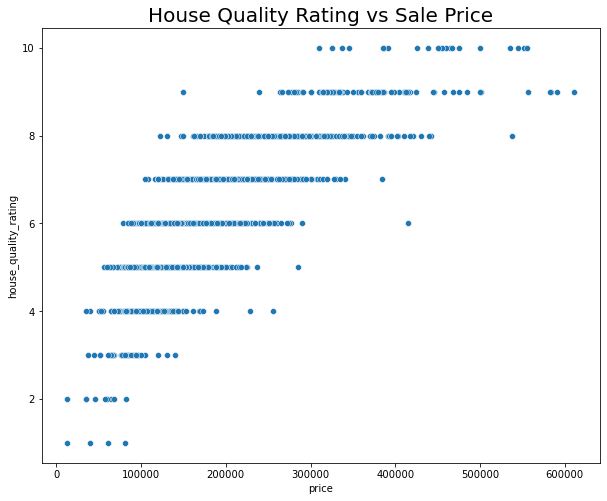

In [61]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='house_quality_rating', data=train_data)
plt.title('House Quality Rating vs Sale Price', fontsize=20)

Text(0.5, 1.0, 'Above Ground Living Area Square Footage vs Sale Price')

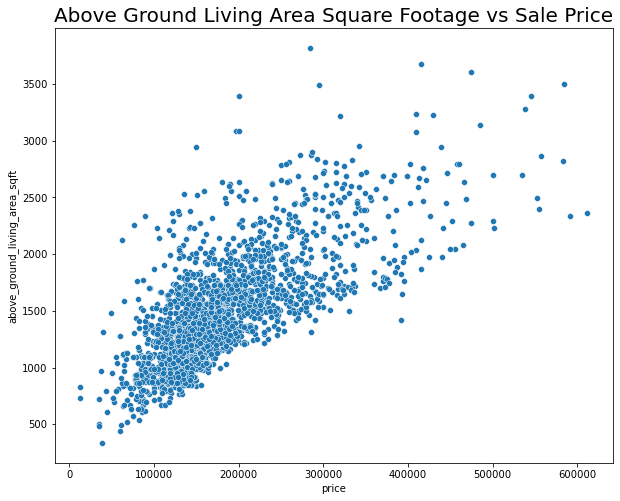

In [62]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='above_ground_living_area_sqft', data=train_data)
plt.title('Above Ground Living Area Square Footage vs Sale Price', fontsize=20)

Text(0.5, 1.0, 'Total Basement Square Footage vs Sale Price')

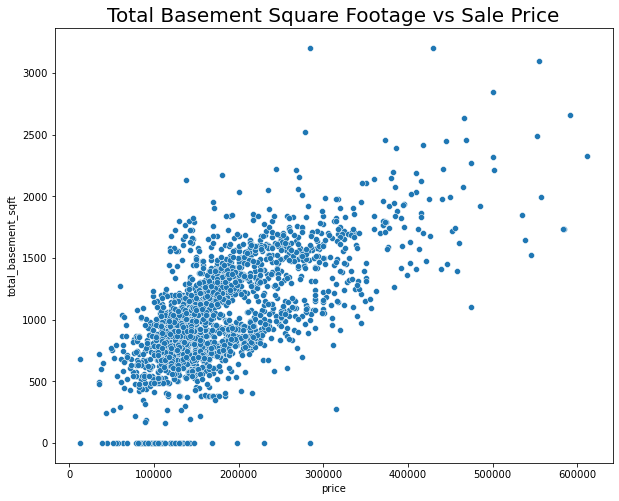

In [63]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='price', y='total_basement_sqft', data=train_data)
plt.title('Total Basement Square Footage vs Sale Price', fontsize=20)

All three demonstrate a linear relationship with the target variable.

## Data Modeling

In [64]:
# Set the Top 10 variables  as features for the model 
features = ['house_quality_rating', 'above_ground_living_area_sqft', 'garage_sqft','garage_capacity','bathrooms',
            'total_basement_sqft','year_built','total_rooms(non-bath)','masonry_area',
            'fireplaces']
X=train_data[features]
y=train_data['price']

In [65]:
# Set the Top 10 variables  as features for the model 
X_testdata=test_data[features] 

### Polynomial Features

In [66]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)

In [67]:
poly

PolynomialFeatures(include_bias=False)

In [68]:
# Create X_poly
X_poly = poly.fit_transform(X)

In [69]:
# X_poly is a numpy array with the original AND new columns!
X_poly

array([[6.0000e+00, 1.4790e+03, 4.7500e+02, ..., 8.3521e+04, 0.0000e+00,
        0.0000e+00],
       [7.0000e+00, 2.1220e+03, 5.5900e+02, ..., 1.7424e+04, 1.3200e+02,
        1.0000e+00],
       [5.0000e+00, 1.0570e+03, 2.4600e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [6.0000e+00, 1.9130e+03, 3.4200e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [4.0000e+00, 1.2000e+03, 2.9400e+02, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+00],
       [7.0000e+00, 1.8040e+03, 4.4200e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [70]:
# Create X_testdata_poly
X_testdata_poly=poly.fit_transform(X_testdata)

In [71]:
# Get the feature names using "get_feature_names"
poly.get_feature_names(features)

['house_quality_rating',
 'above_ground_living_area_sqft',
 'garage_sqft',
 'garage_capacity',
 'bathrooms',
 'total_basement_sqft',
 'year_built',
 'total_rooms(non-bath)',
 'masonry_area',
 'fireplaces',
 'house_quality_rating^2',
 'house_quality_rating above_ground_living_area_sqft',
 'house_quality_rating garage_sqft',
 'house_quality_rating garage_capacity',
 'house_quality_rating bathrooms',
 'house_quality_rating total_basement_sqft',
 'house_quality_rating year_built',
 'house_quality_rating total_rooms(non-bath)',
 'house_quality_rating masonry_area',
 'house_quality_rating fireplaces',
 'above_ground_living_area_sqft^2',
 'above_ground_living_area_sqft garage_sqft',
 'above_ground_living_area_sqft garage_capacity',
 'above_ground_living_area_sqft bathrooms',
 'above_ground_living_area_sqft total_basement_sqft',
 'above_ground_living_area_sqft year_built',
 'above_ground_living_area_sqft total_rooms(non-bath)',
 'above_ground_living_area_sqft masonry_area',
 'above_ground_livi

In [72]:
# View X_poly in a DataFrame
X_poly_df=pd.DataFrame(X_poly, columns=poly.get_feature_names(features))

In [73]:
# View X_testdata_polyin a DataFrame
X_testdata_poly_df=pd.DataFrame(X_testdata_poly, columns=poly.get_feature_names(features))

### Train Test Split

In [74]:
#Use train_test_split to generate your train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)

In [75]:
# Get the shapes of train and test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1531, 65)
(511, 65)
(1531,)
(511,)


### Data Scaling and Model Fitting

In [78]:
# Scale our data.
# Relabel scaled data as "Z" 
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)
test_data_sc=sc.transform(X_testdata_poly_df)

In [79]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (1531, 65)
y_train shape is: (1531,)
Z_test shape is: (511, 65)
y_test shape is: (511,)


### Linear Regression

In [80]:
ols = LinearRegression()
ols.fit(Z_train, y_train) # Make sure to fit on SCALED data!

LinearRegression()

In [81]:
# Model score on the training and test data
print(" OLS ".center(18, "="))
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))
print()

====== OLS =======
0.903687683067107
0.8831149537762257



In [82]:
ols.predict(Z_train) #Generate predictions from LR model

array([105686.01423355, 306271.67496749, 145235.59444409, ...,
       135745.32126866, 108977.9717688 , 250883.0682619 ])

In [83]:
ols.predict(Z_test) #Generate predictions from LR model

array([145399.31661526, 219399.19684243, 121350.13185469, 158296.56950521,
       434421.43125615, 252941.86171344, 334469.03075851, 213994.82060421,
       126864.14898131, 111377.71755138, 170192.03809896, 330768.64881992,
       136021.4624694 , 182113.83296906, 243270.02411729, 160243.13514058,
       140192.37548458, 146119.47267726, 143677.46638088, 218001.5854583 ,
       125344.23825786, 145406.24521167, 119958.28734479, 339817.80724955,
       156426.18823729, 179290.07692416, 256491.12936432, 124801.62576467,
       140152.9016925 , 182307.20142204,  86471.28531643, 157685.31088601,
       182250.43127073, 196866.2236827 , 499005.72892533, 131678.12673868,
       131290.9811054 , 130571.61249857, 300688.76966708, 234052.37175793,
       271341.62544761, 104388.28568535, 343707.54999017, 169851.69610001,
       113287.31331972, 334458.6684632 , 103725.23332643, 201897.27904298,
       150439.98676242, 164708.65968354, 246079.12679039, 153405.02761978,
       163379.39701557, 1

In [84]:
y_scaler_preds=ols.predict(Z_train)
y_scaler_preds_test=ols.predict(Z_test) # Create predictions

In [85]:
mean_squared_error(y_true=y_test, y_pred=y_scaler_preds_test, squared=False) # RMSE for the LR Model

26661.953684419863

### RidgeCV Regression

In [86]:
# Set up a list of ridge alphas to check.
# np.logspace generates 10 values equally between 0 and 2,
# then converts them to alphas between 10^0 and 10^2.
r_alphas = np.logspace(0, 2, 10)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

In [87]:
# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train)

RidgeCV(alphas=array([  1.        ,   1.66810054,   2.7825594 ,   4.64158883,
         7.74263683,  12.91549665,  21.5443469 ,  35.93813664,
        59.94842503, 100.        ]),
        cv=5, scoring='r2')

In [88]:
ridge_cv.alpha_ # Here is the optimal value of alpha

12.91549665014884

In [89]:
print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

===== Ridge ======
0.8979340861503027
0.8875055457288323


In [90]:
ridgecv_preds=ridge_cv.predict(Z_train)
ridgecv_preds_test=ridge_cv.predict(Z_test) # Generate predictions from Ridge model

In [91]:
mean_squared_error(y_true=y_test, y_pred=ridgecv_preds_test, squared=False)#RMSE for the  Ridge Model

26156.404791528366

### LassoCV Regression

In [92]:
# Cross-validate over Lasso alphas.
lasso_cv = LassoCV(n_alphas=100, cv=5)

# Fit model using best lasso alpha!
lasso_cv.fit(Z_train, y_train);

/Users/yash/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15426827501.591919, tolerance: 974561673.5703186
  model = cd_fast.enet_coordinate_descent(


In [93]:
# Here is the optimal value of alpha
lasso_cv.alpha_ 

140.36889650751422

In [94]:
print(" LASSO ".center(18, "="))
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

===== LASSO ======
0.8950705701400375
0.8879099532960163


In [95]:
lasso_preds=lasso_cv.predict(Z_train)
lasso_preds_test=lasso_cv.predict(Z_test)  # Generate predictions from Lasso model

In [96]:
np.shape(lasso_cv.coef_) #Check shape of Lasso Coefficients

(65,)

In [97]:
#Convert coefficients into dataframe
coef_df = pd.DataFrame([lasso_cv.coef_, poly.get_feature_names(features)], index = ['Coefficients', 'Features']).T
coef_df = coef_df.set_index('Features')

coef_df = coef_df.sort_values(by='Coefficients',ascending=False)
coef_df.head(10) 

,Coefficients
Features,
house_quality_rating above_ground_living_area_sqft,32561.687357
house_quality_rating total_basement_sqft,30773.59154
bathrooms masonry_area,11047.788636
bathrooms total_basement_sqft,8105.145652
house_quality_rating garage_sqft,7946.876334
total_basement_sqft masonry_area,6796.670265
garage_capacity masonry_area,5719.290818
year_built,5258.738626
house_quality_rating fireplaces,5242.704467


**Plot features with highest coefficients**

Text(0.5, 0, 'Strenth of Predictor')

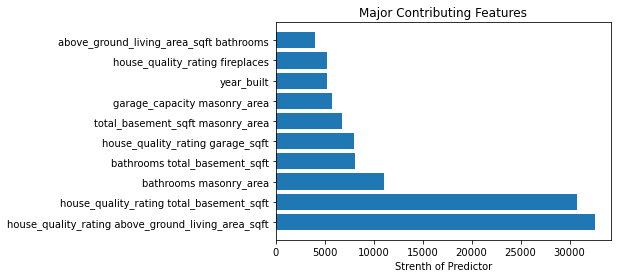

In [98]:
plt.barh(y=coef_df.index[:10], width=coef_df['Coefficients'][0:10]);
plt.title('Major Contributing Features')
plt.xlabel('Strenth of Predictor')

Order of top predictors  from our initial assessment didn't vary much, though variable like Total Rooms is missing

**Plot residuals to check for linearity**

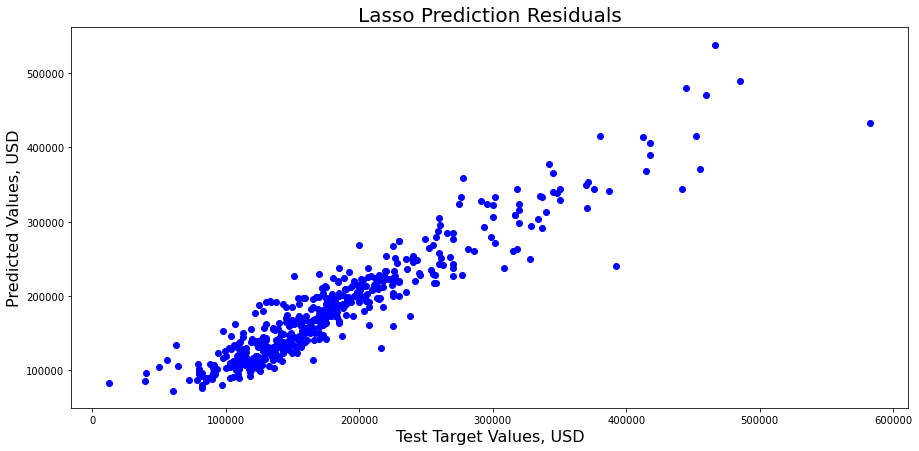

In [99]:
plt.figure(figsize=(15,7))
plt.scatter(y_test, lasso_preds_test, color='b');
plt.title('Lasso Prediction Residuals', fontsize=20)
plt.xlabel('Test Target Values, USD', fontsize=16)
plt.ylabel('Predicted Values, USD', fontsize=16)
plt.show()

The model performs best on homes that fall within the median price range, with some outliers on the lower and higher ends of the price values. This may be due to scattered representation of homes within those ranges in the data set.

In [100]:
mean_squared_error(y_true=y_test, y_pred=lasso_preds_test,squared=False) #RMSE for the  Lasso Model

26109.347486220548

In [101]:
# Percentage of variables in the original data that have been zeroed out by the lasso:
len(coef_df[coef_df['Coefficients'] == 0]) / len(coef_df['Coefficients'])

0.5230769230769231

In [102]:
test_subset = test_data_sc
kaggle_preds_lasso = lasso_cv.predict(test_subset) #Generate predictions for 'Test' data

In [103]:
#Convert them into dataframe
kaggle_df_lasso = pd.DataFrame({
    'Id': test_data['id'],
    'SalePrice': kaggle_preds_lasso
})

In [104]:
#Save in a 'submissions' folder with a name 'lasso.csv'
kaggle_df_lasso.to_csv('submissions/lasso.csv', index=False) 

## Model Evauation

|        Model       	| Train Score 	| Test Score 	|   RMSE  	|
|:------------------:	|:-----------:	|:----------:	|:-------:	|
| 	Linear Regression 	|     0.90    	|    0.88    	|  26661 	|
|        RidgeCV      	|     0.89    	|    0.88    	|  26156    |
|      LassoCV      	|     0.89    	|    0.88    	|  26109  	|

Due to the below factors,LassoCV Model is considered best fit :
 - RMSE is comparatively lower than the other two
 - Difference between the Train score and Test Score  is less